[[  2.10400000e+03   3.00000000e+00   3.99900000e+05]
 [  1.60000000e+03   3.00000000e+00   3.29900000e+05]
 [  2.40000000e+03   3.00000000e+00   3.69000000e+05]
 [  1.41600000e+03   2.00000000e+00   2.32000000e+05]
 [  3.00000000e+03   4.00000000e+00   5.39900000e+05]
 [  1.98500000e+03   4.00000000e+00   2.99900000e+05]
 [  1.53400000e+03   3.00000000e+00   3.14900000e+05]
 [  1.42700000e+03   3.00000000e+00   1.98999000e+05]
 [  1.38000000e+03   3.00000000e+00   2.12000000e+05]
 [  1.49400000e+03   3.00000000e+00   2.42500000e+05]
 [  1.94000000e+03   4.00000000e+00   2.39999000e+05]
 [  2.00000000e+03   3.00000000e+00   3.47000000e+05]
 [  1.89000000e+03   3.00000000e+00   3.29999000e+05]
 [  4.47800000e+03   5.00000000e+00   6.99900000e+05]
 [  1.26800000e+03   3.00000000e+00   2.59900000e+05]
 [  2.30000000e+03   4.00000000e+00   4.49900000e+05]
 [  1.32000000e+03   2.00000000e+00   2.99900000e+05]
 [  1.23600000e+03   3.00000000e+00   1.99900000e+05]
 [  2.60900000e+03   4.00000

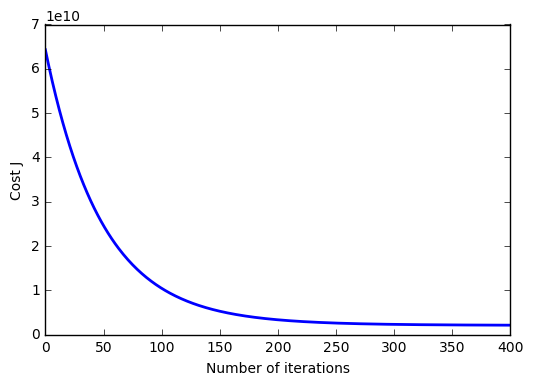

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):
 $289,221.55


In [121]:
#!/usr/bin/env python

import numpy as np

## ================ Part 1: Feature Normalization ================

def featureNormalize(X):
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    m = X.shape[1]
    
    for i in np.arange(m):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:, i] = (X[:,i] - float(mu[:,i])) / float(sigma[:,i])
    
    return X_norm, mu, sigma
        
# Loading data 
data = np.loadtxt('ex1data2.txt', delimiter=",")
print(data)
X = data[:, :2]
y = data[:, 2]

# number of training examples
m = len(y) 

# Normalizing Features...
X_norm, mu, sigma = featureNormalize(X)

# Add intercept term to X
X_padded = np.column_stack((np.ones((m,1)), X_norm)) # Add a column of ones to x

## ================ Part 2: Gradient Descent ================
def computeCost(X, y, theta):
    m = len(y)
    h = np.power(( X.dot(theta) - np.transpose([y]) ), 2)
    J = (1.0/(2*m)) * h.sum( axis = 0 )
    return J
    
def gradientDescentMulti(X, y, theta, alpha, iters):
   
    # Initialize some useful values
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))
    for i in np.arange(iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))
        J_history[i] = computeCost(X, y, theta)
        
    return theta, J_history
    
# Choose some alpha value
alpha = 0.01
num_iters = 400

# Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1))

theta, J_history = gradientDescentMulti(X_padded, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(range(J_history.size), J_history, "-b", linewidth=2 )
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show(block=False)

# Estimate the price of a 1650 sq-ft, 3 br house
# Recall that the first column of X is all-ones. Thus, it does
# not need to be normalized.
area_norm = (1650 - float(mu[:,0])) / float(sigma[:,0])
br_norm = (3 - float(mu[:,1]))/float(sigma[:,1])
house_norm_padded = np.array([1, area_norm, br_norm])
price = np.array(house_norm_padded).dot(theta)

# ============================================================

print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):\n ${:,.2f}".format(price[0]))